In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
from datetime import datetime

import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from torchmetrics import MeanSquaredError

from dlwpt import ROOT
from dlwpt.basic_autoencoder import AutoEncoder, AutoEncoderDataset
from dlwpt.trainer import Trainer
from dlwpt.utils import set_device, get_mnist_datasets

In [37]:
def plot_loss(results):
    with plt.style.context('ggplot'):
        plt.plot('epoch', 'train_loss', data=results, label='Training Loss')
        plt.plot('epoch', 'valid_loss', data=results, label='Validation Loss')
        plt.title('Loss by Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

In [86]:
NOW = datetime.now().strftime('%Y%m%d-%H%M')
LOG_DIR = ROOT.joinpath('runs', NOW)
BATCH = 128

device = set_device()

In [87]:
train, test = get_mnist_datasets(do_augment=False)
train, test = AutoEncoderDataset(train), AutoEncoderDataset(test)

train_loader = DataLoader(train, batch_size=BATCH, shuffle=True)
test_loader = DataLoader(test, batch_size=BATCH)

In [ ]:
mod = AutoEncoder(layers=(128, 64, 16), input_shape=(28, 28))
opt = torch.optim.AdamW(mod.parameters(), lr=0.001)
trainer = Trainer(
    mod, epochs=25, device=device, log_dir=LOG_DIR, checkpoint_file=LOG_DIR.joinpath('model.pt'),
    optimizer=opt, score_funcs={'mse': MeanSquaredError()}
)
trainer.fit(train_loader, test_loader)

Batch:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 312/469 [00:05<00:03, 45.00it/s]

In [ ]:
plot_loss(trainer.results)

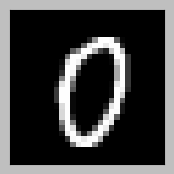

In [82]:
with plt.style.context('grayscale'):
    img = train.dataset.data[1000]
    plt.figure(figsize=(2, 2))
    plt.tick_params(left = False, right = False, labelleft = False,labelbottom = False, bottom = False)
    plt.imshow(img)
    plt.show()

In [83]:
mod.eval()
with torch.no_grad():
    img_ae = mod.predict(img[None, None, :].to(torch.float32).to(device))

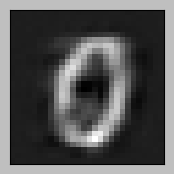

In [85]:
with plt.style.context('grayscale'):
    img = train.dataset.data[0]
    plt.figure(figsize=(2, 2))
    plt.tick_params(left = False, right = False, labelleft = False,labelbottom = False, bottom = False)
    plt.imshow(img_ae.cpu().squeeze())
    plt.show()